In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

In [4]:
bild1 = imread("bildverbesserung/bild1.png")
bild3 = imread("bildverbesserung/bild3.png")

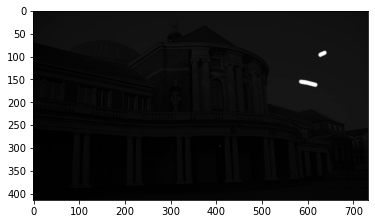

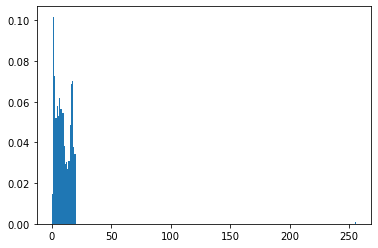

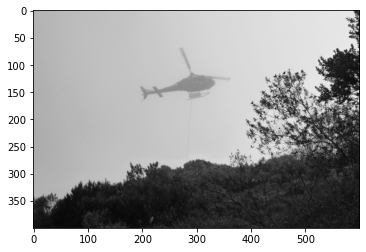

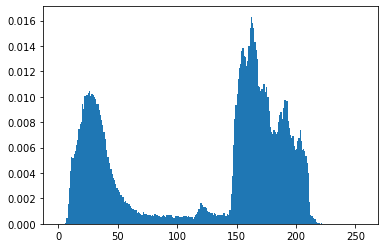

In [32]:
def show_hist():
    hist_bild1 = np.histogram(bild1, bins=256, range=(0,256), density=True)
    plt.figure(1)
    plt.imshow(bild1, cmap="Greys_r", vmin=0, vmax=255)
    plt.figure(2)
    plt.hist(bild1.flatten(), bins=256, range=(0,256), density=True)
    
    hist_bild3 = np.histogram(bild3, bins=256, range=(0,256), density=True)
    plt.figure(3)
    plt.imshow(bild3, cmap="Greys_r", vmin=0, vmax=255)
    plt.figure(4)
    plt.hist(bild3.flatten(), bins=256, range=(0,256), density=True)
    
    return hist_bild1, hist_bild3

hist_bild1, hist_bild3 = show_hist()

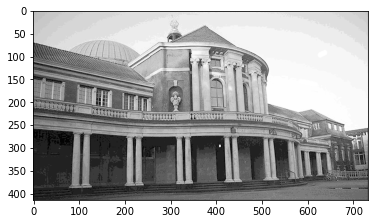

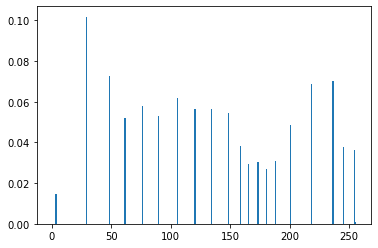

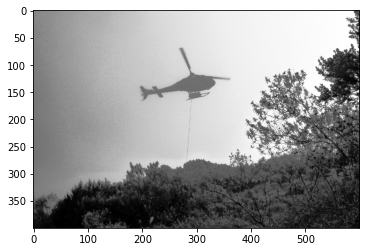

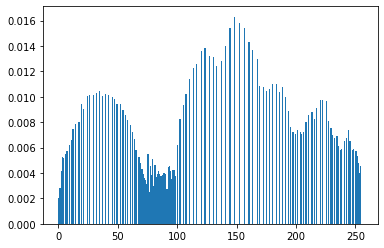

In [56]:
def equalize_hist(img):
    hist_img = np.histogram(img, bins=256, range=(0,256), density=True)
    cummulative_img = np.cumsum(hist_img[0])
    
    transform = []
    for cummulative in cummulative_img:
        new = (len(cummulative_img) - 1) * cummulative
        transform.append(int(new))
    
    equalized_img = np.copy(img)
    for y in range(equalized_img.shape[0]):
        for x in range(equalized_img.shape[1]):
            equalized_img[y, x] = transform[img[y, x]]
    
    return equalized_img, transform

def show_equalized_img():
    bild1_equalized, _ = equalize_hist(bild1)
    bild3_equalized, _ = equalize_hist(bild3)
    
    plt.figure(1)
    plt.imshow(bild1_equalized, cmap="Greys_r", vmin=0, vmax=255)
    plt.figure(2)
    plt.hist(bild1_equalized.flatten(), bins=256, range=(0,256), density=True)
    plt.figure(3)
    plt.imshow(bild3_equalized, cmap="Greys_r", vmin=0, vmax=255)
    plt.figure(4)
    plt.hist(bild3_equalized.flatten(), bins=256, range=(0,256), density=True)

def compare_results():
    bild1_equalized, _ = equalize_hist(bild1)
    plt.figure(1)
    plt.hist(bild1.flatten(), bins=256, range=(0,256), density=True)
    plt.hist(bild1_equalized.flatten(), bins=256, range=(0,256), density=True)
    
    bild3_equalized, _ = equalize_hist(bild3)
    plt.figure(2)
    plt.hist(bild3.flatten(), bins=256, range=(0,256), density=True)
    plt.hist(bild3_equalized.flatten(), bins=256, range=(0,256), density=True)

    
show_equalized_img()


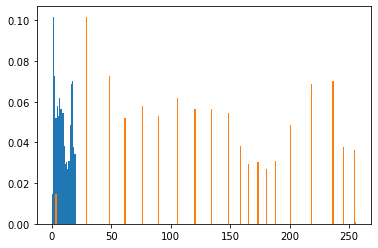

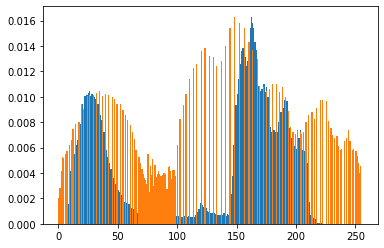

In [57]:
compare_results()

#In Bild 1 werden die meisten dunklen Bereiche im Bild auf helle Werte abgebildet.
#Die hellen Bereiche bleiben nahezu unverändert und das Bild wird heller.
#Mit Bild 3 wurde der Wert auf den gesamten Wertebereich gestretched und den Kontrast erhöht

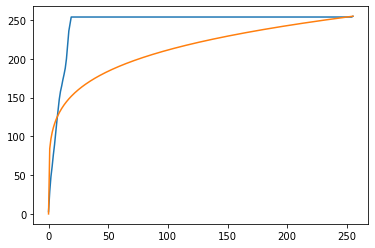

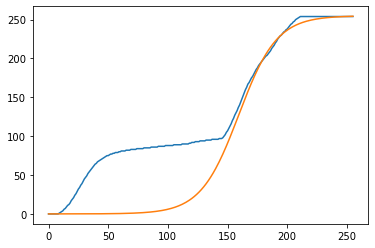

In [58]:
def f(x):
    return (255**0.8) * (x**0.2)

def g(x):
    var = np.e**((x / 255)*16-10)
    num = 255 * var
    den = 1 + var
    return num/den

def mapping():
    _, mapping1 = equalize_hist(bild1)
    _, mapping3 = equalize_hist(bild3)
    
    plt.figure(1)
    plt.plot(range(len(mapping1)), mapping1)
    plt.plot(range(len(mapping1)), list(map(f, range(len(mapping1)))))
    plt.figure(2)
    plt.plot(range(len(mapping3)), mapping3)
    plt.plot(range(len(mapping3)), list(map(g, range(len(mapping3)))))
    plt.show()
    
mapping()

In [ ]:
#Die Musterlösung für Bild 1 erscheint insgesamt heller und weist einen geringeren Kontrast auf.
#Dies kann dadurch erklärt werden, dass die Intensitätsumwandlung (insbesondere in dunklen Bereichen) erfolgt
#steiler als die Transformationsfunktion, daher gibt es weniger dunkle Bereiche.

#Die Musterlösung für Bild 3 weist weniger Kontrast und weniger Rauschen auf.
#Dies kann dadurch erklärt werden, dass die Transformationsfunktion nur
#kritische Bereiche bei der Durchführung von Intensitätstransformationen erheblich gedehnt werden.